## Import Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df2 = pd.read_csv('Data_grouped_by_data.csv', parse_dates=['date'], infer_datetime_format=True)

## Baseline model with Regression 

### A) Predicting Iron Concentrate 

Baseline Model Iron Concentrate
Train R2 Score: 0.155
MAE Score: 0.824
MSE Score: 1.086
Test R2 Score: 0.168


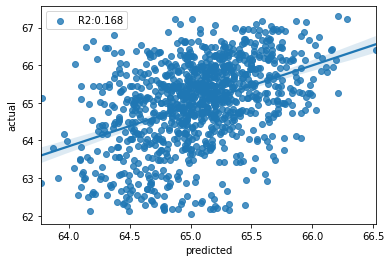


Most Important Features:


,features,Coefficient
6,Ore Pulp Density,3.063679
5,Ore Pulp pH,0.451809
10,Flotation Column 04 Air Flow,-0.037709
11,Flotation Column 05 Air Flow,0.035079
0,% Iron Feed,0.026284


In [12]:
#creating baseline model to predict iron concentrate & silica concentrate
X = df2.iloc[:,1:22]
Y = df2['% Iron Concentrate']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Baseline Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make graph to compare R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})
print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

### B) Predicting Silica Concentrate 

In [ ]:
#creating baseline model to predict iron concentrate & silica concentrate
X = df2.iloc[:,1:22]
Y = df2['% Silica Concentrate']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Baseline Model Silica Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})

print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

## Normalize Data 

In [ ]:
df2 = df.groupby(by='date').mean().reset_index()

#feature enginnering
df2['total airflow'] = df2.iloc[:,7:14].sum(axis=1)
df2['total level'] = df2.iloc[:,14:21].sum(axis=1)
df2.drop(columns='date',inplace = True)

# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer()
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate', 'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate','total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([df2_pt,df2_ss], axis=1)

## Poly Reg Model

### A) Predicting Iron Concentrate 

In [ ]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#initialize and fit training dataset
model = make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
#a = X.columns.tolist()
#b = model.coef_
#c = pd.DataFrame({"features":a, "Coefficient":b})

print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

### B) Predicting Iron Concentrate

In [ ]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#initialize and fit training dataset
model = make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Optimized Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
#a = X.columns.tolist()
#b = model.coef_
#c = pd.DataFrame({"features":a, "Coefficient":b})

print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

# Random Forest ModeL

### A) Predicting Iron Concentrate 

In [ ]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import RandomForestRegressor

#initialize and fit training dataset
model = RandomForestRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

#define hyperparameters we want to tune
param_grid = {
    'n_estimators' : [5,10,15,100,150],
    'criterion' : ['mse,', 'mae'],
    'max_depth' : [5,8,10,12,15]
}

#instantiate GridSearchCV, fit model, and make prediction
model = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model_results = pd.DataFrame(model.cv_results_)